In [1]:
import sys
code_path = '/Users/caiq/Workspace/adp/text-classifier/src'
sys.path.append(code_path)

In [4]:
import os
import torch
import logging
from dataloader.data_loader import load_data
from textclassifier.text_tester import test
from textclassifier.text_trainer import set_trainer
from utils.commons import load_checkpoint
from utils.opts import Config, parse_opt, load_config
from dataloader import run_sent_prepro

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

logging.basicConfig(format="%(filename)s: %(message)s")
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.propagate = False

## Load Configuration

In [6]:
logger.info('Parsing configuration file ...')
config_dict = load_config('/Users/caiq/Workspace/adp/text-classifier/config/cr_sents/textmlp.yaml')
config = Config(config_dict)

<ipython-input-6-7acea5760ccd>: Parsing configuration file ...
<ipython-input-6-7acea5760ccd>: Preprocessing data ...



Training data: reading and preprocessing...



100%|██████████| 86137/86137 [00:21<00:00, 3967.39it/s]



Training data: discarding words with counts less than 5, the size of the vocabulary is 9562.

Training data: word map saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

Training data: encoding and padding...

Training data: saving...

Training data: encoded, padded data saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

Test data: reading and preprocessing...



100%|██████████| 21534/21534 [00:05<00:00, 3771.91it/s]



Test data: encoding and padding...

Test data: saving...

Test data: encoded, padded data saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

All done!



## Preprocessing

In [7]:
logger.info('Preprocessing data ...')
run_sent_prepro(
    csv_folder=config.dataset_path,
    output_folder=config.output_path,
    word_limit=config.word_limit,
    min_word_count=config.min_word_count
)

<ipython-input-7-d758ed94befd>: Preprocessing data ...



Training data: reading and preprocessing...



100%|██████████| 86137/86137 [00:24<00:00, 3583.27it/s]



Training data: discarding words with counts less than 5, the size of the vocabulary is 9562.

Training data: word map saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

Training data: encoding and padding...

Training data: saving...

Training data: encoded, padded data saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

Test data: reading and preprocessing...



100%|██████████| 21534/21534 [00:06<00:00, 3523.73it/s]



Test data: encoding and padding...

Test data: saving...

Test data: encoded, padded data saved to /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents.

All done!



## Training

In [9]:
trainer = set_trainer(config)
trainer.run_train()

Loading embeddings from /Users/caiq/Workspace/adp/text-classifier/data/outputs/cr_sents/sents/glove.6B.50d.txt.pth.tar
Epoch: [0][0/1346]	Batch Time 0.604 (0.604)	Data Load Time 0.537 (0.537)	Loss 1.3829 (1.3829)	Accuracy 0.312 (0.312)
Epoch: [0][100/1346]	Batch Time 0.023 (0.027)	Data Load Time 0.001 (0.006)	Loss 1.1706 (1.2910)	Accuracy 0.406 (0.367)
Epoch: [0][200/1346]	Batch Time 0.022 (0.024)	Data Load Time 0.001 (0.003)	Loss 1.1289 (1.2602)	Accuracy 0.422 (0.394)
Epoch: [0][300/1346]	Batch Time 0.022 (0.023)	Data Load Time 0.001 (0.002)	Loss 1.2095 (1.2427)	Accuracy 0.594 (0.428)
Epoch: [0][400/1346]	Batch Time 0.019 (0.023)	Data Load Time 0.001 (0.002)	Loss 1.1431 (1.2266)	Accuracy 0.656 (0.457)
Epoch: [0][500/1346]	Batch Time 0.021 (0.023)	Data Load Time 0.001 (0.002)	Loss 1.1038 (1.2098)	Accuracy 0.609 (0.481)
Epoch: [0][600/1346]	Batch Time 0.020 (0.022)	Data Load Time 0.001 (0.002)	Loss 0.9927 (1.1867)	Accuracy 0.672 (0.503)
Epoch: [0][700/1346]	Batch Time 0.023 (0.022)	Data

Epoch: [4][900/1346]	Batch Time 0.019 (0.019)	Data Load Time 0.001 (0.001)	Loss 0.6782 (0.5243)	Accuracy 0.859 (0.836)
Epoch: [4][1000/1346]	Batch Time 0.019 (0.019)	Data Load Time 0.001 (0.001)	Loss 0.4735 (0.5239)	Accuracy 0.875 (0.837)
Epoch: [4][1100/1346]	Batch Time 0.019 (0.019)	Data Load Time 0.001 (0.001)	Loss 0.5619 (0.5216)	Accuracy 0.844 (0.838)
Epoch: [4][1200/1346]	Batch Time 0.018 (0.019)	Data Load Time 0.000 (0.001)	Loss 0.6085 (0.5194)	Accuracy 0.828 (0.839)
Epoch: [4][1300/1346]	Batch Time 0.019 (0.019)	Data Load Time 0.001 (0.001)	Loss 0.3152 (0.5200)	Accuracy 0.922 (0.839)
Epoch: [4] finished, time consumed: 143.735

DECAYING learning rate.
The new learning rate is 0.000590

Epoch: [5][0/1346]	Batch Time 0.094 (0.094)	Data Load Time 0.054 (0.054)	Loss 0.6069 (0.6069)	Accuracy 0.844 (0.844)
Epoch: [5][100/1346]	Batch Time 0.024 (0.021)	Data Load Time 0.001 (0.001)	Loss 0.5167 (0.5160)	Accuracy 0.828 (0.843)
Epoch: [5][200/1346]	Batch Time 0.021 (0.021)	Data Load Time 

Epoch: [9][400/1346]	Batch Time 0.019 (0.022)	Data Load Time 0.001 (0.001)	Loss 0.5623 (0.4694)	Accuracy 0.875 (0.856)
Epoch: [9][500/1346]	Batch Time 0.020 (0.021)	Data Load Time 0.001 (0.001)	Loss 0.3214 (0.4706)	Accuracy 0.922 (0.856)
Epoch: [9][600/1346]	Batch Time 0.022 (0.021)	Data Load Time 0.001 (0.001)	Loss 0.6432 (0.4707)	Accuracy 0.859 (0.855)
Epoch: [9][700/1346]	Batch Time 0.017 (0.021)	Data Load Time 0.000 (0.001)	Loss 0.4560 (0.4709)	Accuracy 0.859 (0.855)
Epoch: [9][800/1346]	Batch Time 0.019 (0.021)	Data Load Time 0.001 (0.001)	Loss 0.4041 (0.4710)	Accuracy 0.906 (0.855)
Epoch: [9][900/1346]	Batch Time 0.018 (0.020)	Data Load Time 0.001 (0.001)	Loss 0.3171 (0.4694)	Accuracy 0.891 (0.855)
Epoch: [9][1000/1346]	Batch Time 0.019 (0.020)	Data Load Time 0.001 (0.001)	Loss 0.3626 (0.4705)	Accuracy 0.891 (0.855)
Epoch: [9][1100/1346]	Batch Time 0.019 (0.020)	Data Load Time 0.001 (0.001)	Loss 0.4384 (0.4711)	Accuracy 0.891 (0.854)
Epoch: [9][1200/1346]	Batch Time 0.019 (0.020)

## Loading Persisted Model

In [10]:
checkpoint_path = os.path.join(config.checkpoint_path, config.checkpoint_basename + '.pth.tar')
model, model_name, optimizer, dataset_name, word_map, start_epoch = load_checkpoint(checkpoint_path, device)
model = model.to(device)
model.eval()  # Sets the module in evaluation mode.

TextMLP(
  (embeddings): Embedding(9562, 50)
  (hidden_fc): Linear(in_features=50, out_features=10, bias=True)
  (out_fc): Linear(in_features=10, out_features=4, bias=True)
)

## Evaluation on test.csv

Evaluating: 100%|██████████| 337/337 [00:00<00:00, 397.10it/s]



Test Accuracy - 83.6

Confusion matrix:


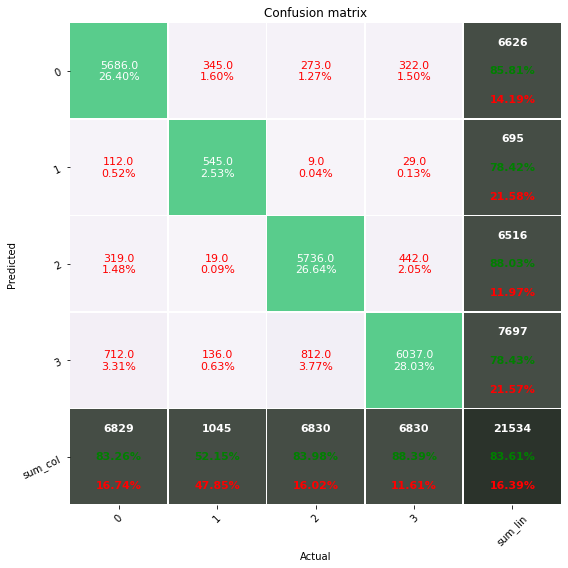

In [11]:
test_loader = load_data(config, "test")
test(model, model_name, test_loader, dataset_name)

## Error Analysis

In [16]:
import pandas as pd
from collections import defaultdict

model, model_name, optimizer, dataset_name, word_map, start_epoch = load_checkpoint(checkpoint_path, device)
_, rev_label_map = get_label_map(dataset_name)
test_df = pd.read_csv(config.dataset_path + '/test.csv')
wrong_prediction_df = pd.DataFrame()
catched = defaultdict(list)
for iter, row in test_df.iterrows():
    text = row['Text']
    label = rev_label_map[row['Label']-1]
    predicted_label, predicted_score = classify(
        text, model, model_name, rev_label_map, word_map, word_limit)

    if predicted_label != label:
        catched['Text'].append(text)
        catched['Gold_Label'].append(label)
        catched['Predicted_Label'].append(predicted_label)

        # print('\n{}'.format(text))
        # print('Gold label: {}'.format(label))
        # print('Predicted label: {}'.format(predicted_label))

for gold_label, predicted_label, text in zip(catched['Gold_Label'],
                                             catched['Predicted_Label'],
                                             catched['Text']):
    print('{}\t\t{}\t\t{}'.format(gold_label, predicted_label, text))

NameError: name 'get_label_map' is not defined